In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Pearson Correlation
from scipy import stats
from sklearn.linear_model import LinearRegression
# Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# Mean Squared Error
from sklearn.metrics import mean_squared_error
# R^2
from sklearn.metrics import r2_score
# Split data
from sklearn.model_selection import train_test_split
# Cross Validation Score
from sklearn.model_selection import cross_val_score
# Cross Validation Prediction
from sklearn.model_selection import cross_val_predict
# To use interact() running other functions
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
# Import Ridge
from sklearn.linear_model import Ridge
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'

cars = pd.read_csv(path)
cars.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [ ]:
print("The first 5 rows of the dataframe")
cars.head(10)

The first 5 rows of the dataframe


,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
5,2,122,audi,std,two,sedan,fwd,front,99.8,0.851994,...,8.5,110.0,5500.0,19,25,15250.0,12.368421,Medium,0,1
6,1,158,audi,std,four,sedan,fwd,front,105.8,0.925997,...,8.5,110.0,5500.0,19,25,17710.0,12.368421,Medium,0,1
7,1,122,audi,std,four,wagon,fwd,front,105.8,0.925997,...,8.5,110.0,5500.0,19,25,18920.0,12.368421,Medium,0,1
8,1,158,audi,turbo,four,sedan,fwd,front,105.8,0.925997,...,8.3,140.0,5500.0,17,20,23875.0,13.823529,Medium,0,1
9,2,192,bmw,std,two,sedan,rwd,front,101.2,0.849592,...,8.8,101.0,5800.0,23,29,16430.0,10.217391,Low,0,1


In [ ]:
print("The last 10 rows of the dataframe")
cars.tail(10)

The last 10 rows of the dataframe


,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
191,-1,74,volvo,std,four,wagon,rwd,front,104.3,0.907256,...,9.5,114.0,5400.0,23,28,13415.0,10.217391,Medium,0,1
192,-2,103,volvo,std,four,sedan,rwd,front,104.3,0.907256,...,9.5,114.0,5400.0,24,28,15985.0,9.791667,Medium,0,1
193,-1,74,volvo,std,four,wagon,rwd,front,104.3,0.907256,...,9.5,114.0,5400.0,24,28,16515.0,9.791667,Medium,0,1
194,-2,103,volvo,turbo,four,sedan,rwd,front,104.3,0.907256,...,7.5,162.0,5100.0,17,22,18420.0,13.823529,High,0,1
195,-1,74,volvo,turbo,four,wagon,rwd,front,104.3,0.907256,...,7.5,162.0,5100.0,17,22,18950.0,13.823529,High,0,1
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,9.5,114.0,5400.0,23,28,16845.0,10.217391,Medium,0,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,8.7,160.0,5300.0,19,25,19045.0,12.368421,High,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium,0,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,23.0,106.0,4800.0,26,27,22470.0,9.038462,Medium,1,0
200,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,9.5,114.0,5400.0,19,25,22625.0,12.368421,Medium,0,1


In [ ]:
# Relace "?" with NaN (as missing value)
cars = cars.replace('?', np.NaN)
cars.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [ ]:
print(cars.columns)

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'horsepower-binned', 'diesel', 'gas'],
      dtype='object')


In [ ]:
# Save Dataset to device
cars.to_csv("usedcars.csv", index=True)

### Data Wrangling

#### Data Standardization

<p>
You usually collect data from different agencies in different formats.
(Data standardization is also a term for a particular type of data normalization where you subtract the mean and divide by the standard deviation.)
</p>
    
<b>What is standardization?</b>
<p>Standardization is the process of transforming data into a common format, allowing the researcher to make the meaningful comparison.
</p>

<b>Example</b>
<p>Transform mpg to L/100km:</p>
<p>In your data set, the fuel consumption columns "city-mpg" and "highway-mpg" are represented by mpg (miles per gallon) unit. Assume you are developing an application in a country that accepts the fuel consumption with L/100km standard.</p>
<p>You will need to apply <b>data transformation</b> to transform mpg into L/100km.</p>

In [ ]:
# Convert mpg to L/100km
cars["city-L/100km"] = 235/cars["city-mpg"]
cars.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [ ]:
# Transform highway-mpf
cars["highway-mpg"] = 235/cars["highway-mpg"]

# Rename to highway-L/100km
cars.rename(columns ={"highway-mpg":"highway-L/100km"}, inplace = True)
cars.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,8.703704,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,8.703704,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,9.038462,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,7.833333,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,10.681818,17450.0,13.055556,Medium,0,1


#### Data Normaization
<b>Why normalization?</b>
<p>Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include
<ol>
    <li>scaling the variable so the variable average is 0</li>
    <li>scaling the variable so the variance is 1</li>
    <li>scaling the variable so the variable values range from 0 to 1</li>
</ol>
</p>

<b>Example</b>
<p>To demonstrate normalization, say you want to scale the columns "length", "width" and "height".</p>
<p><b>Target:</b> normalize those variables so their value ranges from 0 to 1</p>
<p><b>Approach:</b> replace the original value by (original value)/(maximum value)</p>

In [ ]:
# Replace (original value) by (original value)/(maximum value)
cars['length'] = cars['length']/cars['length'].max()
cars['width'] = cars['width']/cars['width'].max()

In [ ]:
# Nomalize the column 'height'
cars['height'] = cars['height']/cars['height'].max()

# show the scaled columns
cars[["length","width","height"]].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


#### Binning
<b>Why binning?</b>
<p>
    Binning is a process of transforming continuous numerical variables into discrete categorical 'bins' for grouped analysis.
</p>

<b>Example: </b>
<p>In your data set, "horsepower" is a real valued variable ranging from 48 to 288 and it has 59 unique values. What if you only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)? You can rearrange them into three ‘bins' to simplify analysis.</p>

<p>Use the Pandas method 'cut' to segment the 'horsepower' column into 3 bins.</p>

In [ ]:
# Covert data to correct format
cars["horsepower"] = cars["horsepower"].astype(int, copy=True)

Text(0.5, 1.0, 'horsepower bins')

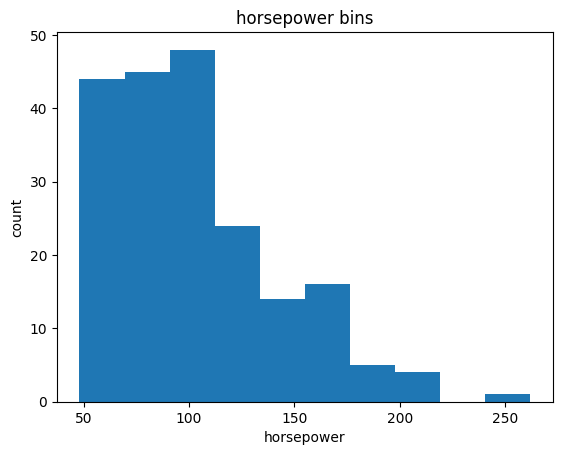

In [ ]:
# Plot the histogram of horsepower to see the distribution of horsepower
plt.hist(cars["horsepower"])

# set x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

<p>Find 3 bins of equal size bandwidth by using Numpy's <code>linspace(start_value, end_value, numbers_generated</code> function.</p>
<p>Since you want to include the minimum value of horsepower, set start_value = min(df["horsepower"]).</p>
<p>Since you want to include the maximum value of horsepower, set end_value = max(df["horsepower"]).</p>
<p>Since you are building 3 bins of equal length, you need 4 dividers, so numbers_generated = 4.</p>

Build a bin array with a minimum value to a maximum value by using the bandwidth calculated above. The values will determine when one bin ends and another begins.


In [ ]:
bins = np.linspace(min(cars["horsepower"]), max(cars["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [ ]:
# Set group names
group_names = ['Low', 'Medium', 'High']

# Apply the function "cut" to determine what each value of d'horsepower' belongs to
cars['horsepower-binned'] = pd.cut(cars['horsepower'], bins, labels=group_names, include_lowest=True )
cars[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


In [ ]:
# Count of each bin:
cars["horsepower-binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

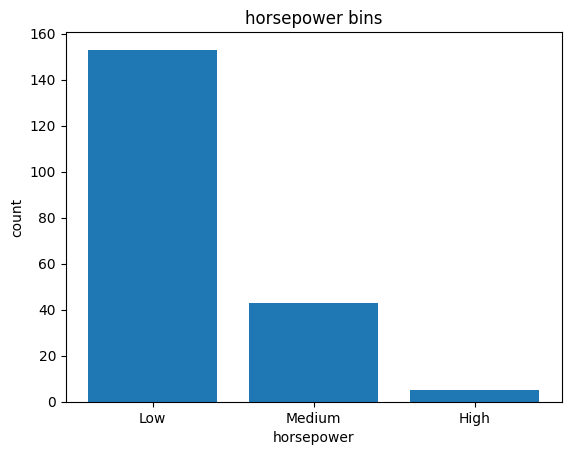

In [ ]:
# Plot the distribtion of bins
plt.bar(group_names, cars["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

<p>
   The last column provides the bins for "horsepower" based on 3 categories ("Low", "Medium" and "High").
</p>
<p>
    It was successfully narrowed down the intervals from 59 to 3!
</p>

#### Bin Visualization


Text(0.5, 1.0, 'horsepower bins')

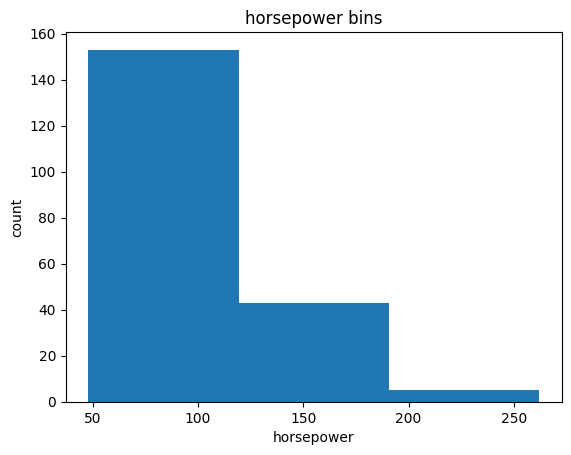

In [ ]:
# Use a histogram to visualize the distribution of bins
# draw historgram of attribute "horsepower" with bins = 3
plt.hist(cars["horsepower"], bins = 3)

# set x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

The plot above shows the binning result for the attribute "horsepower"

#### Indicator Variable
<b>What is an indicator variable?</b>
<p>
    An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning.
</p>

<b>Why use indicator variables?</b>
<p>
    You use indicator variables so you can use categorical variables for regression analysis in the later modules.
</p>
<b>Example</b>
<p>
    The column "fuel-type" has two unique values: "gas" or "diesel". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, you can convert "fuel-type" to indicator variables.
</p>

<p>
    Use the Panda method 'get_dummies' to assign numerical values to different categories of fuel type.
</p>

In [ ]:
cars.columns

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-L/100km', 'price',
       'city-L/100km', 'horsepower-binned', 'diesel', 'gas'],
      dtype='object')

In [ ]:
# get indicator variables of aspiration and assign it to data frame "dummy_variable_2"
dummy_variable_2 = pd.get_dummies(cars['aspiration'])

# change column names for clarity
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)

# show first 5 instances of data frame "dummy_variable_1"
dummy_variable_2.head()


,aspiration-std,aspiration-turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [ ]:
# merge the new dataframe to the original dataframe
cars_copy = pd.concat([cars, dummy_variable_2], axis = 1)

# drop original column "aspiration" from "df"
cars_copy.drop('aspiration', axis = 1, inplace = True)

### Exploratory Data Analysis

#### Analyzing Individual Feature Patterns Using Visualization
<h4>How to choose the right visualization method?</h4>
<p>When visualizing individual variables, it is important to first understand what type of variable you are dealing with. This will help us find the right visualization method for that variable.</p>

In [ ]:
# Data types
cars.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

In [ ]:
# Get a statistical summary of each column (show only numerial columns)
cars.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [ ]:
# Get a statistical summary of each column (show all columns including object-typed columns)
cars.describe(include = "all")

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
count,201.000000,201.00000,201,201,201,201,201,201,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,200,201.000000,201.000000
unique,NaN,NaN,22,2,2,5,3,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN
top,NaN,NaN,toyota,std,four,sedan,fwd,front,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,NaN,NaN
freq,NaN,NaN,32,165,115,94,118,198,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115,NaN,NaN
mean,0.840796,122.00000,NaN,NaN,NaN,NaN,NaN,NaN,98.797015,0.837102,...,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,NaN,0.099502,0.900498
std,1.254802,31.99625,NaN,NaN,NaN,NaN,NaN,NaN,6.066366,0.059213,...,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,NaN,0.300083,0.300083
min,-2.000000,65.00000,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,0.678039,...,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,NaN,0.000000,0.000000
25%,0.000000,101.00000,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,0.801538,...,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,NaN,0.000000,1.000000
50%,1.000000,122.00000,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,0.832292,...,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,NaN,0.000000,1.000000
75%,2.000000,137.00000,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,0.881788,...,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,NaN,0.000000,1.000000


In [ ]:
# Select certain columns:
cars[['symboling', 'make', 'price']]

,symboling,make,price
0,3,alfa-romero,13495.0
1,3,alfa-romero,16500.0
2,1,alfa-romero,16500.0
3,2,audi,13950.0
4,2,audi,17450.0
...,...,...,...
196,-1,volvo,16845.0
197,-1,volvo,19045.0
198,-1,volvo,21485.0
199,-1,volvo,22470.0


In [ ]:
# Get statistics of certain columns:
cars[['symboling', 'make', 'price']].describe()

,symboling,price
count,201.000000,201.000000
mean,0.840796,13207.129353
std,1.254802,7947.066342
min,-2.000000,5118.000000
25%,0.000000,7775.000000
50%,1.000000,10295.000000
75%,2.000000,16500.000000
max,3.000000,45400.000000


In [ ]:
# Provide a concise summary of dataframe
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

In [ ]:
cars['peak-rpm'].info

<bound method Series.info of 0      5000.0
1      5000.0
2      5000.0
3      5500.0
4      5500.0
        ...  
196    5400.0
197    5300.0
198    5500.0
199    4800.0
200    5400.0
Name: peak-rpm, Length: 201, dtype: float64>

In [ ]:
# Calculate the correlation:
cars.corr()

<ipython-input-15-338eb4f8129e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cars.corr()


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


In [ ]:
# Find the correlation between the following columns: bore, stroke, compression-ratio, and horsepower.
cars[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


#### Continuous Numerical Variables

<p>Continuous numerical variables are variables that may contain any value within some range. They can be of type "int64" or "float64". A great way to visualize these variables is by using scatterplots with fitted lines.</p>

<p>In order to start understanding the (linear) relationship between an individual variable and the price, we can use "regplot" which plots the scatterplot plus the fitted regression line for the data. This will be useful later on for visualizing the fit of the simple linear regression model as well. </p>


##### Positive Linear Relationship

(0.0, 53200.87920778204)

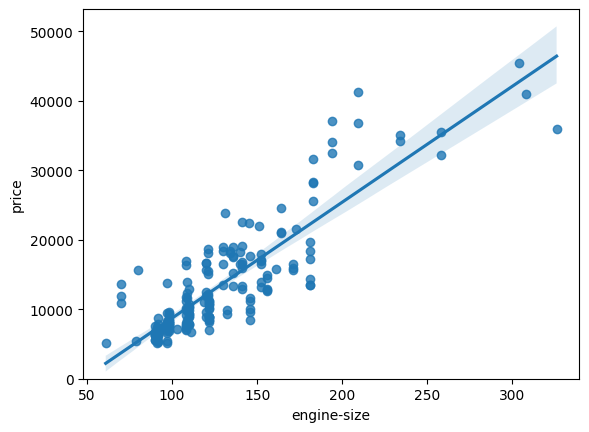

In [ ]:
# Find the scatterplot of "engine-size" and "price"
sns.regplot(x='engine-size', y = 'price', data = cars)
plt.ylim(0,)

<p>As the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables. Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.</p>

 We can examine the correlation between 'engine-size' and 'price' and see that it's approximately 0.87.


In [ ]:
# The correlation between 'engine-size' vs 'price'
cars[['engine-size', 'price']].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


Highway mpg is a potential predictor variable of price. Let's find the scatterplot of "highway-mpg" and "price".

<Axes: xlabel='highway-mpg', ylabel='price'>

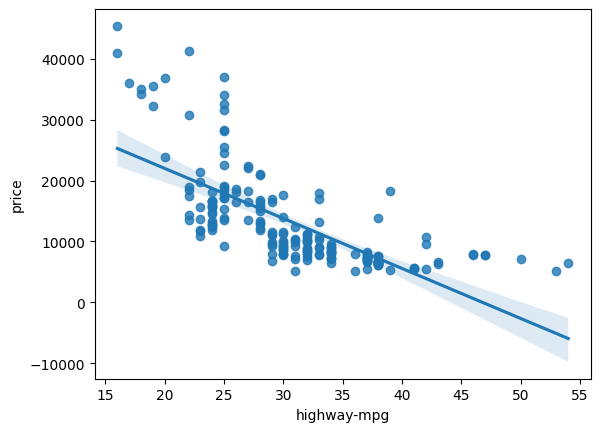

In [ ]:
# The scatteplot: 'highway-mpg' vs 'price'
sns.regplot(x='highway-mpg', y='price', data=cars)

<p>As highway-mpg goes up, the price goes down: this indicates an inverse/negative relationship between these two variables. Highway mpg could potentially be a predictor of price.</p>

We can examine the correlation between 'highway-mpg' and 'price' and see it's approximately -0.704.

In [ ]:
# The correalation: 'highway-mpg' vs 'price'
cars[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


##### Weak Linear Relationship

<Axes: xlabel='peak-rpm', ylabel='price'>

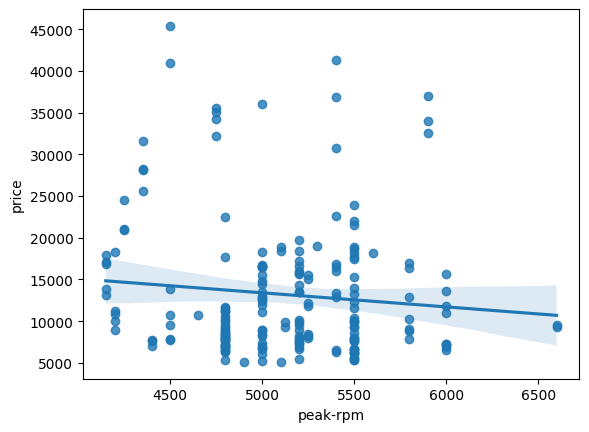

In [ ]:
import matplotlib.pyplot as plt

# Check if 'peak-rpm' is a predictor variable of 'price'
sns.regplot(x='peak-rpm', y='price', data=cars)

<p>Peak rpm does not seem like a good predictor of the price at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore, it's not a reliable variable.</p>

We can examine the correlation between 'peak-rpm' and 'price' and see it's approximately -0.101616.


In [ ]:
# The correlation of: peak-rpm vs price
cars[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


In [ ]:
# The correlation of: stroke vs price
cars[['stroke','price']].corr()

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


<Axes: xlabel='stroke', ylabel='price'>

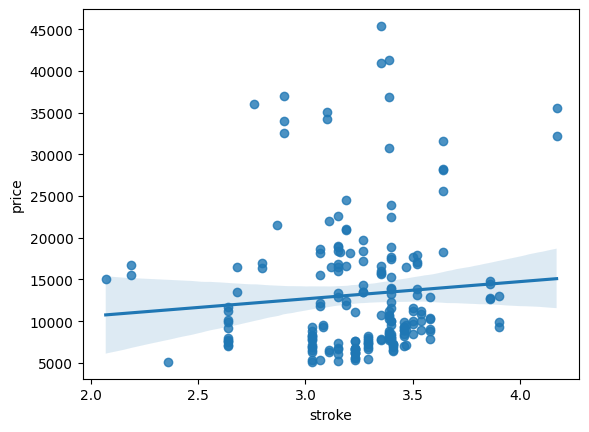

In [ ]:
# The scatteplot: 'stroke' vs 'price'
sns.regplot(x='stroke', y='price', data=cars)

#### Categorical Variables
<p>These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.</p>

<Axes: xlabel='body-style', ylabel='price'>

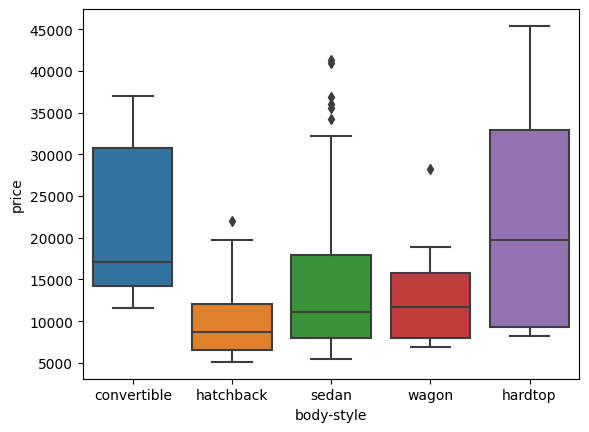

In [ ]:
# The relationship: 'body-style' vs 'price'
sns.boxplot(x='body-style', y='price', data=cars)

<p>We see that the distributions of price between the different body-style categories have a significant overlap, so body-style would not be a good predictor of price. Let's examine engine "engine-location" and "price":</p>


<Axes: xlabel='engine-location', ylabel='price'>

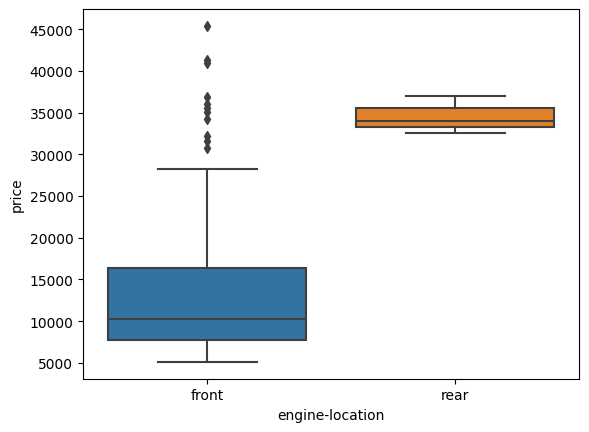

In [ ]:
# The relationship: 'engine-location' vs 'price'
sns.boxplot(x='engine-location', y='price', data=cars)

<p>Here we see that the distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price.</p>


<Axes: xlabel='drive-wheels', ylabel='price'>

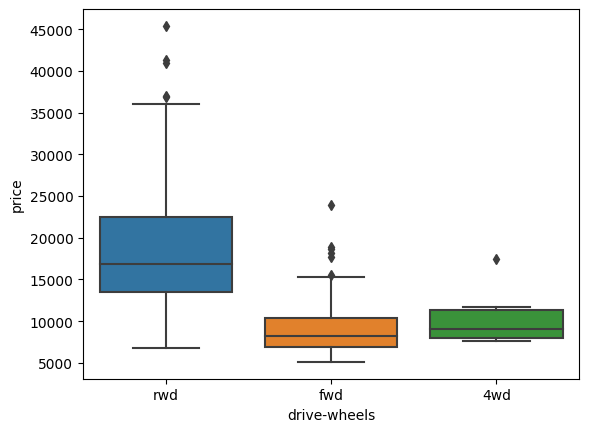

In [ ]:
# The relationship: 'drive-wheel' vs 'price'
sns.boxplot(x='drive-wheels', y='price', data=cars)

<p>Here we see that the distribution of price between the different drive-wheels categories differs. As such, drive-wheels could potentially be a predictor of price.</p>

#### Descriptive Statistical Analysis
<p>Let's first take a look at the variables by utilizing a description method.</p>

<p>The <b>describe</b> function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.</p>

This will show:
<ul>
    <li>the count of that variable</li>
    <li>the mean</li>
    <li>the standard deviation (std)</li>
    <li>the minimum value</li>
    <li>the IQR (Interquartile Range: 25%, 50% and 75%)</li>
    <li>the maximum value</li>
<ul>

In [ ]:
#  Descriptive Statistical Analysis
cars.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [ ]:
# Apply the method "describe" on the variables of type 'object' :
cars.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


##### Value Counts

In [ ]:
# Value counts: drive-wheels
cars['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [ ]:
# Convert to a dataframe
drive_wheels_counts = cars['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels':'value_counts'}, inplace = True)
print(drive_wheels_counts)

     value_counts
fwd           118
rwd            75
4wd             8


In [ ]:
# Rename index to 'drive-wheels'
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


In [ ]:
# Value counts: engine-location
engine_location_counts = cars['engine-location'].value_counts().to_frame()
engine_location_counts.rename(columns={'engine-location':'value_counts'}, inplace=True)
engine_location_counts.index.name = 'engine-location'
engine_location_counts

,value_counts
engine-location,
front,198
rear,3


After examining the value counts of the engine location, we see that engine location would not be a good predictor variable for the price. This is because we only have three cars with a rear engine and 198 with an engine in the front, so this result is skewed. Thus, we are not able to draw any conclusions about the engine location.

##### Basics of Grouping
<p>The "groupby" method groups data by different categories. The data is grouped based on one or several variables, and analysis is performed on the individual groups.</p>

<p>For example, let's group by the variable "drive-wheels". We see that there are 3 different categories of drive wheels.</p>


In [ ]:
# Group by the variable "drive-wheels"
cars['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

<p>If we want to know, on average, which type of drive wheel is most valuable, we can group "drive-wheels" and then average them.</p>

In [ ]:
# Select the columns 'drive-wheels', 'body-style' and 'price'
cars_group1 = cars[['drive-wheels', 'body-style', 'price']]

In [ ]:
# Calculate the average price for each of the different categories of data
cars_group1 = cars_group1.groupby(['drive-wheels'], as_index=False).mean()
cars_group1

<ipython-input-36-ef93b24e6696>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cars_group1 = cars_group1.groupby(['drive-wheels'], as_index=False).mean()


,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


<p>From our data, it seems rear-wheel drive vehicles are, on average, the most expensive, while 4-wheel and front-wheel are approximately the same in price.</p>

<p>You can also group by multiple variables. For example, let's group by both 'drive-wheels' and 'body-style'. This groups the dataframe by the unique combination of 'drive-wheels' and 'body-style'. We can store the results in the variable 'grouped_test1'.</p>

In [ ]:
cars_gptest = cars[['drive-wheels', 'body-style', 'price']]
cars_grouped_test1 = cars_gptest.groupby(['drive-wheels', 'body-style'], as_index=False).mean()
cars_grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


<p>This grouped data is much easier to visualize when it is made into a pivot table. A pivot table is like an Excel spreadsheet, with one variable along the column and another along the row. We can convert the dataframe to a pivot table using the method "pivot" to create a pivot table from the groups.</p>

<p>In this case, we will leave the drive-wheels variable as the rows of the table, and pivot body-style to become the columns of the table:</p>

In [ ]:
# Pivot the groupby df to visualize
grouped_pivot = cars_group2_counts.pivot(index='drive-wheels', columns = 'body-style')

In [ ]:
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

<p>Often, we won't have data for some of the pivot cells. We can fill these missing cells with the value 0, but any other value could potentially be used as well. It should be mentioned that missing data is quite a complex subject and is an entire course on its own.</p>


In [ ]:
# Fill missing value in grouped_pivot with 0
grouped_pivot = grouped_pivot.fillna(0)
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [ ]:
# Find the average "price" of each car based on "body-style"
cars_gptest2 = cars[['body-style','price']]
grouped_test_bodystyle = cars_gptest2.groupby(['body-style'],as_index= False).mean()
grouped_test_bodystyle

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


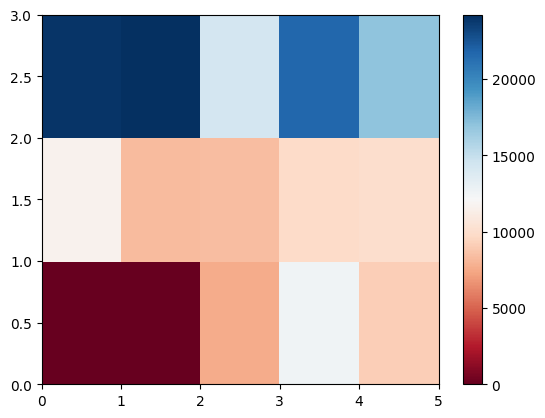

In [ ]:
# Use a heat map to visualize the relationship between Body Style vs Price
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

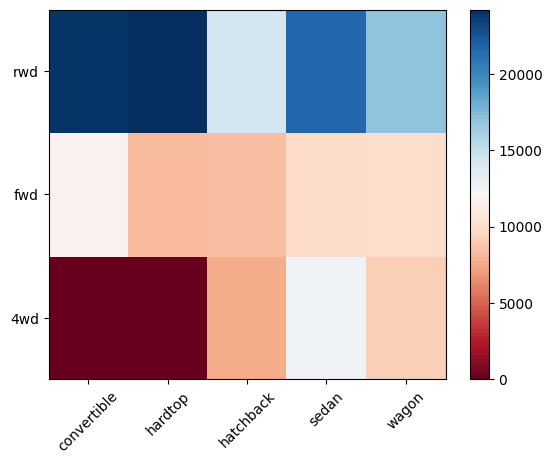

In [ ]:
# Add labels
fig, ax = plt.subplots()
im= ax.pcolor(grouped_pivot, cmap='RdBu')

# Label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

# Move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

# Insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

# Rotate label if too long
plt.xticks(rotation=45)

fig.colorbar(im)
plt.show()

#### Correlation and Causation
<p><b>Correlation</b>: a measure of the extent of interdependence between variables.</p>

<p><b>Causation</b>: the relationship between cause and effect between two variables.</p>

<p>It is important to know the difference between these two. Correlation does not imply causation. Determining correlation is much simpler  the determining causation as causation may require independent experimentation.</p>


<p><b>Pearson Correlation</b></p>
<p>The Pearson Correlation measures the linear dependence between two variables X and Y.</p>
<p>The resulting coefficient is a value between -1 and 1 inclusive, where:</p>
<ul>
    <li><b>1</b>: Perfect positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Perfect negative linear correlation.</li>
</ul>

<p>Pearson Correlation is the default method of the function "corr". Like before, we can calculate the Pearson Correlation of the of the 'int64' or 'float64'  variables.</p>


In [ ]:
cars.corr()

<ipython-input-43-9ac39f643503>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cars.corr()


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


<b>P-value</b>
<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the
<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>

In [ ]:
# Calculate the Pearson Correlation Coefficient and P-value of 'wheel-base' and 'price'
pearson_coef, p_value = stats.pearsonr(cars['wheel-base'], cars['price'])
print("The Pearson Correlation Coefficient is ", pearson_coef, " with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is  0.584641822265508  with a P-value of P =  8.076488270732885e-20


Since the p-value is  <
  0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585).

In [ ]:
# The Pearson Correlation Coefficient and P-value of 'horsepower' and 'price'
pearson_coef, p_value = stats.pearsonr(cars['horsepower'], cars['price'])
print("The Pearson Correlation Coefficient is ", pearson_coef, " with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is  0.8095745670036559  with a P-value of P =  6.369057428259557e-48


Since the p-value is  <
  0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.809, close to 1).

In [ ]:
# The Pearson Correlation Coefficient and P-value of 'length' and 'price'
pearson_coef, p_value = stats.pearsonr(cars['length'], cars['price'])
print("The Pearson Correlation Coefficient is ", pearson_coef, " with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is  0.6906283804483638  with a P-value of P =  8.016477466159723e-30


Since the p-value is  <
  0.001, the correlation between length and price is statistically significant, and the linear relationship is moderately strong (~0.691).

In [ ]:
# The Pearson Correlation Coefficient and P-value of 'width' and 'price'
pearson_coef, p_value = stats.pearsonr(cars['width'], cars['price'])
print("The Pearson Correlation Coefficient is ", pearson_coef, " with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is  0.7512653440522673  with a P-value of P =  9.20033551048206e-38


Since the p-value is < 0.001, the correlation between width and price is statistically significant, and the linear relationship is quite strong (~0.751).

In [ ]:
# The Pearson Correlation Coefficient and P-value of 'curb-weight' and 'price'
pearson_coef, p_value = stats.pearsonr(cars['curb-weight'], cars['price'])
print("The Pearson Correlation Coefficient is ", pearson_coef, " with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is  0.8344145257702843  with a P-value of P =  2.189577238893965e-53


Since the p-value is  <
  0.001, the correlation between curb-weight and price is statistically significant, and the linear relationship is quite strong (~0.834).

In [ ]:
# The Pearson Correlation Coefficient and P-value of 'bore' and 'price'
pearson_coef, p_value = stats.pearsonr(cars['bore'], cars['price'])
print("The Pearson Correlation Coefficient is ", pearson_coef, " with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is  0.5431553832626602  with a P-value of P =  8.049189483935315e-17


Since the p-value is  <
  0.001, the correlation between bore and price is statistically significant, but the linear relationship is only moderate (~0.521).


In [ ]:
# The Pearson Correlation Coefficient and P-value of 'engine-size' and 'price'
pearson_coef, p_value = stats.pearsonr(cars['engine-size'], cars['price'])
print("The Pearson Correlation Coefficient is ", pearson_coef, " with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is  0.8723351674455185  with a P-value of P =  9.265491622198793e-64


Since the p-value is  <
  0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.872)

In [ ]:
# The Pearson Correlation Coefficient and P-value of 'city=mpg' and 'price'
pearson_coef, p_value = stats.pearsonr(cars['city-mpg'], cars['price'])
print("The Pearson Correlation Coefficient is ", pearson_coef, " with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is  -0.6865710067844678  with a P-value of P =  2.3211320655675098e-29


Since the p-value is  <
  0.001, the correlation between city-mpg and price is statistically significant, and the coefficient of about -0.687 shows that the relationship is negative and moderately strong.

In [ ]:
# The Pearson Correlation Coefficient and P-value of 'highway-mpg' and 'price'
pearson_coef, p_value = stats.pearsonr(cars['highway-mpg'], cars['price'])
print("The Pearson Correlation Coefficient is ", pearson_coef, " with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is  -0.704692265058953  with a P-value of P =  1.749547114447557e-31


Since the p-value is < 0.001, the correlation between highway-mpg and price is statistically significant, and the coefficient of about -0.705 shows that the relationship is negative and moderately strong.

We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:

Continuous numerical variables:

Length

Width

Curb-weight

Engine-size

Horsepower

City-mpg

Highway-mpg

Wheel-base

Bore

Categorical variables:

Drive-wheels


As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.

<p>In next section, we will develop several models that will predict the price of the car using the variables or features. This is just an estimate but should give us an objective idea of how much the car should cost.</p>

<h2>1. Linear Regression and Multiple Linear Regression</h2>

<h4>Linear Regression</h4>

<p>One example of a Data  Model that we will be using is:</p>
<b>Simple Linear Regression</b>

<br>
<p>Simple Linear Regression is a method to help us understand the relationship between two variables:</p>
<ul>
    <li>The predictor/independent variable (X)</li>
    <li>The response/dependent variable (that we want to predict)(Y)</li>
</ul>

<p>The result of Linear Regression is a <b>linear function</b> that predicts the response (dependent) variable as a function of the predictor (independent) variable.</p>

$$
 Y: Response \ Variable\\\\
 X: Predictor \ Variables
$$

 <b>Linear Function</b>
$$
Yhat = a + b  X
$$

<ul>
    <li>a refers to the <b>intercept</b> of the regression line, in other words: the value of Y when X is 0</li>
    <li>b refers to the <b>slope</b> of the regression line, in other words: the value with which Y changes when X increases by 1 unit</li>
</ul>


<h4>Let's load the modules for linear regression:</h4>

<h4>Create the linear regression object:</h4>

In [ ]:
lm = LinearRegression()
lm

LinearRegression()

<h4>How could "highway-mpg" help us predict car price?</h4>
For this example, we want to look at how highway-mpg can help us predict car price.
Using simple linear regression, we will create a linear function with "highway-mpg" as the predictor variable and the "price" as the response variable.





In [ ]:
X = cars[['highway-mpg']]
Y = cars[['price']]


In [ ]:
# Fit the linear model using highway-mpg:
lm.fit(X,Y)

LinearRegression()

In [ ]:
#  Ouptut a prediction:
Yhat = lm.predict(X)
Yhat[0:5]

array([[16236.50464347],
       [16236.50464347],
       [17058.23802179],
       [13771.3045085 ],
       [20345.17153508]])

In [ ]:
# What is the value of teh intercept(a)?
lm.intercept_

array([38423.30585816])

In [ ]:
# What is the value of the slope (b)?
lm.coef_

array([[-821.73337832]])

<h3>What is the final estimated linear model we get?</h3>
As we saw above, we should get a final linear model with the structure:

$$
Yhat = a + b  X
$$

Plugging in the actual values we get:

<b>Price</b> = 38423.31 - 821.73 x <b>highway-mpg</b>


In [ ]:
# Create linear regression object called lm1
lm1 = LinearRegression()
lm1

LinearRegression()

In [ ]:
# Train the model using "engine-size" as the independent variable and "price" as the dependent variable
lm1.fit(cars[['engine-size']], cars[['price']])
lm1


LinearRegression()

In [ ]:
# Intercept
lm1.intercept_

array([-7963.33890628])

In [ ]:
# Slope
lm1.coef_

array([[166.86001569]])

In [ ]:
# What is the equation of the predicted line?
Yhat = -7963.34 + 166.86 * X

Price = -7963.34 + 166.86 * cars['engine-size']

<h4>Multiple Linear Regression</h4>
<p>What if we want to predict car price using more than one variable?</p>

<p>If we want to use more variables in our model to predict car price, we can use <b>Multiple Linear Regression</b>.
Multiple Linear Regression is very similar to Simple Linear Regression, but this method is used to explain the relationship between one continuous response (dependent) variable and <b>two or more</b> predictor (independent) variables.
Most of the real-world regression models involve multiple predictors. We will illustrate the structure by using four predictor variables, but these results can generalize to any integer:</p>


$$
Y: Response \ Variable\\\\
X_1 :Predictor\ Variable \ 1\\
X_2: Predictor\ Variable \ 2\\
X_3: Predictor\ Variable \ 3\\
X_4: Predictor\ Variable \ 4\\
$$

$$
a: intercept\\\\
b_1 :coefficients \ of\ Variable \ 1\\
b_2: coefficients \ of\ Variable \ 2\\
b_3: coefficients \ of\ Variable \ 3\\
b_4: coefficients \ of\ Variable \ 4\\
$$

The equation is given by:

$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$


<p>From the previous section  we know that other good predictors of price could be:</p>
<ul>
    <li>Horsepower</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Highway-mpg</li>
</ul>
Let's develop a model using these variables as the predictor variables.


In [ ]:
Z = cars[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [ ]:
# Fit the Linear Model using z list
lm.fit(Z, cars['price'])

LinearRegression()

In [ ]:
# What is the value of intercept (a)?
lm.intercept_

-15806.62462632922

In [ ]:
# What is the values of the coeffcients?
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

 What is the final estimated linear model that we get?

 As we saw above, we should get a final linear function with the structure:

$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$

What is the linear function we get in this example?

<b>Price</b> = -15678.742628061467 + 52.65851272 x <b>horsepower</b> + 4.69878948 x <b>curb-weight</b> + 81.95906216 x <b>engine-size</b> + 33.58258185 x <b>highway-mpg</b>


In [ ]:
# Create and train a Multiple Linear Regression model "lm2" where the response variable is "price", and the predictor variable is "normalized-losses" and "highway-mpg"
lm2 = LinearRegression()
lm2.fit(cars[['normalized-losses', 'highway-mpg']], cars['price'])

LinearRegression()

In [ ]:
# Find the Coefficient of the model
lm2.coef_

array([   1.49789586, -820.45434016])

<h2>2. Model Evaluation Using Visualization</h2>
Now that we've developed some models, how do we evaluate our models and choose the best one? One way to do this is by using a visualization.

<h3>Regression Plot</h3>
<p>When it comes to simple linear regression, an excellent way to visualize the fit of our model is by using <b>regression plots</b>.</p>

<p>This plot will show a combination of a scattered data points (a <b>scatterplot</b>), as well as the fitted <b>linear regression</b> line going through the data. This will give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation).</p>


(0.0, 48170.624656791304)

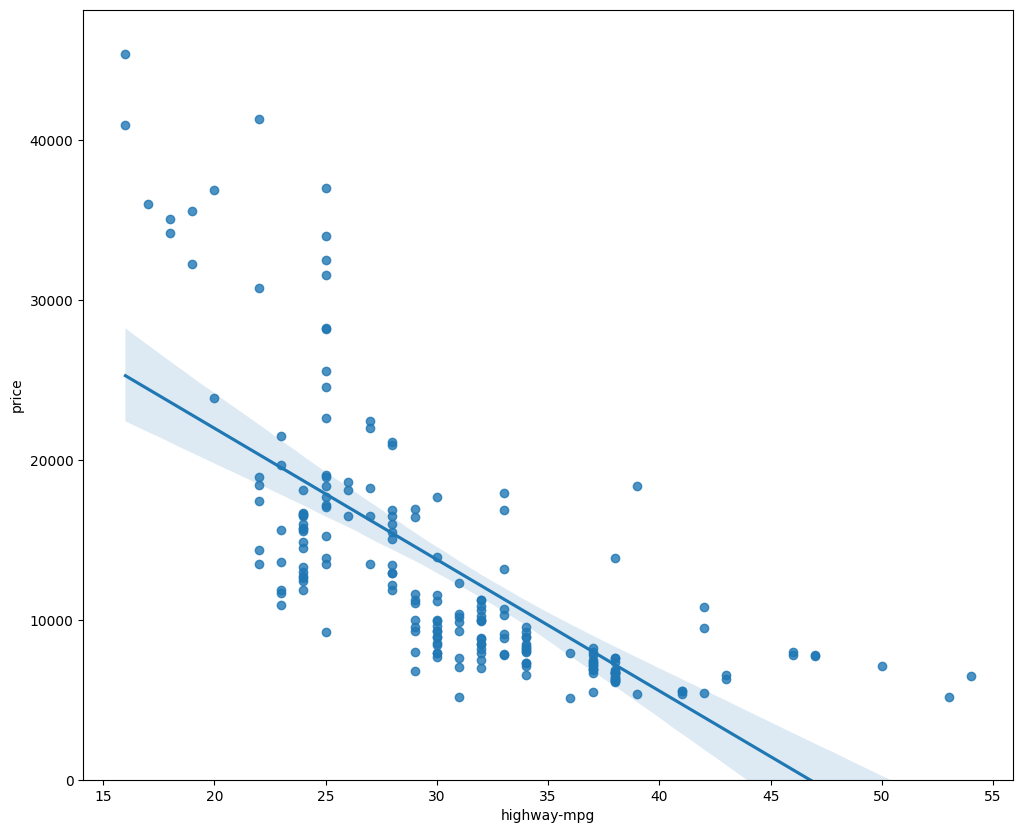

In [ ]:
# Visualize highway-mpg as potential predictor variable of price:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x = 'highway-mpg', y = 'price', data = cars)
plt.ylim(0,)

<p>We can see from this plot that price is negatively correlated to highway-mpg since the regression slope is negative.

One thing to keep in mind when looking at a regression plot is to pay attention to how scattered the data points are around the regression line. This will give you a good indication of the variance of the data and whether a linear model would be the best fit or not. If the data is too far off from the line, this linear model might not be the best model for this data.

Let's compare this plot to the regression plot of "peak-rpm".</p>

(0.0, 47414.1)

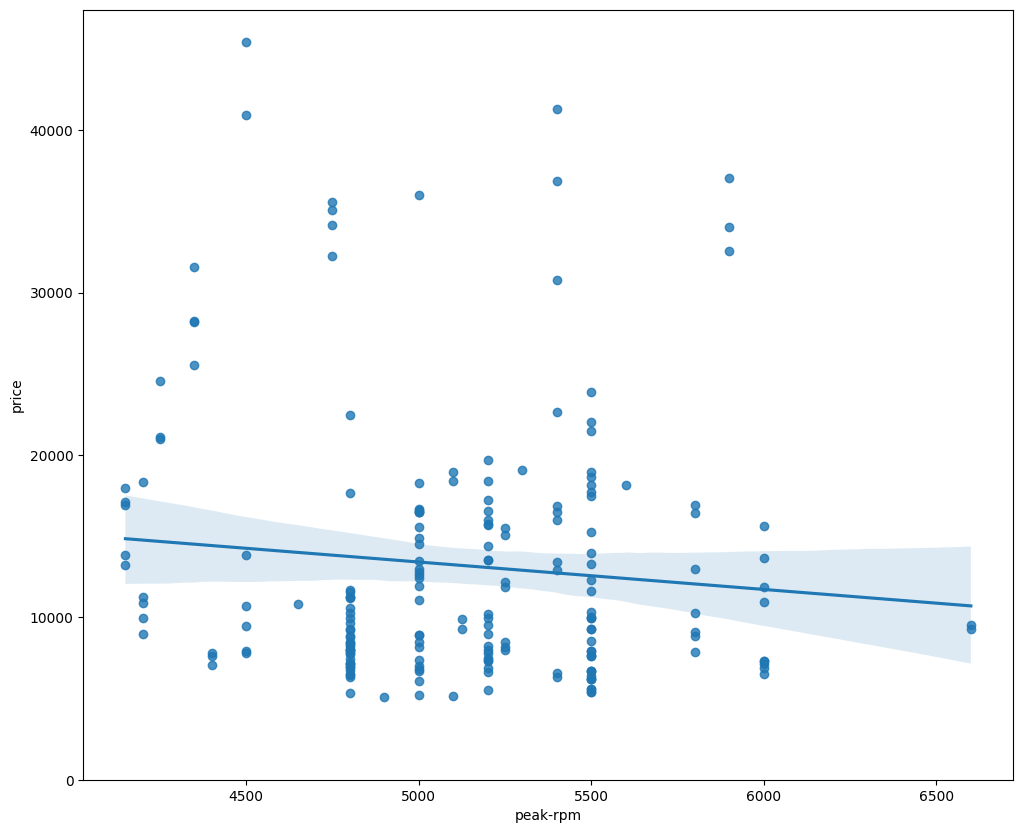

In [ ]:
plt.figure(figsize =(width, height))
sns.regplot(x='peak-rpm', y = 'price', data = cars)
plt.ylim(0,)

<p>Comparing the regression plot of "peak-rpm" and "highway-mpg", we see that the points for "highway-mpg" are much closer to the generated line and, on average, decrease. The points for "peak-rpm" have more spread around the predicted line and it is much harder to determine if the points are decreasing or increasing as the "peak-rpm" increases.</p>

In [ ]:
# Given the regression plots above, is "peak-rpm" or "highway-mpg" more strongly correlated with "price"?
cars[['peak-rpm', 'highway-mpg', 'price']].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


The variable "highway-mpg" has a stronger correlation with "price", it is approximate -0.704692  compared to "peak-rpm" which is approximate -0.101616.

<h3>Residual Plot</h3>

<p>A good way to <b>visualize the variance</b> of the data is to use a residual plot.</p>

<p>What is a <b>residual</b>?</p>

<p>The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the <b>distance from the data point to the fitted regression line</b>.</p>

<p>So what is a <b>residual plot</b>?</p>

<p>A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.</p>

<p>What do we pay attention to when looking at a residual plot?</p>

<p>We look at the spread of the residuals:</p>

<p>- If the points in a residual plot are <b>randomly spread out around the x-axis</b>, then a <b>linear model is appropriate</b> for the data.

Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.</p>

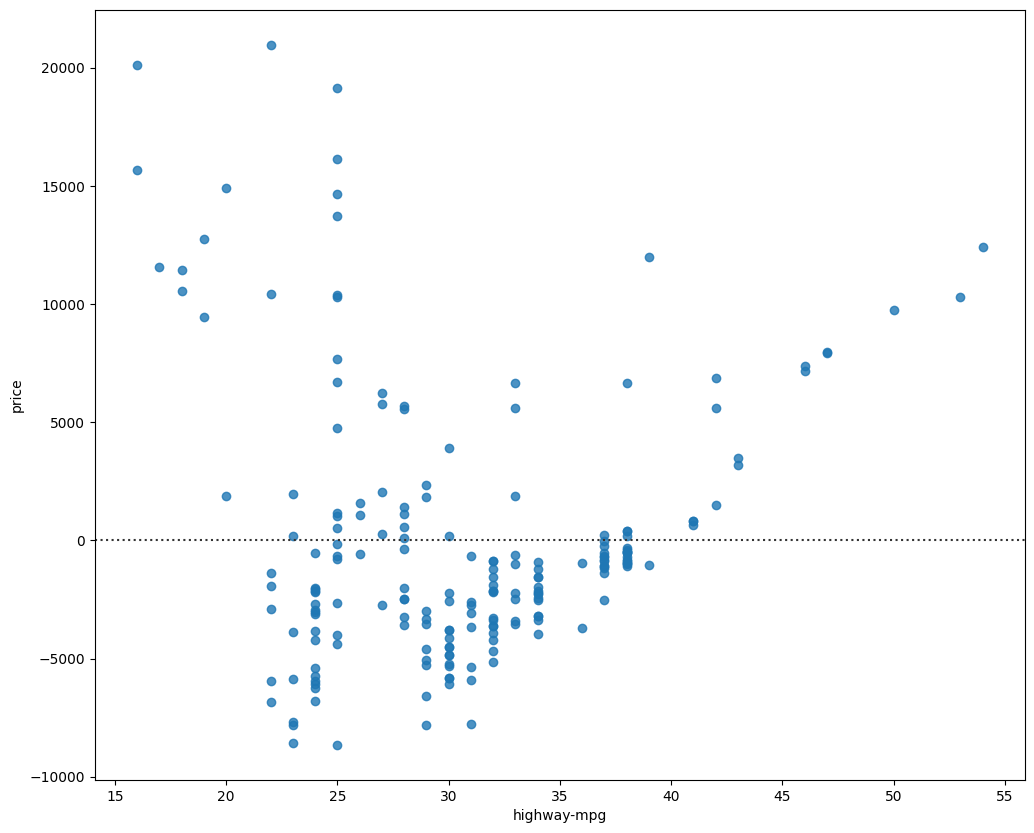

In [ ]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=cars['highway-mpg'], y=cars['price'])
plt.show()

<p>We can see from this residual plot that the residuals are not randomly spread around the x-axis, leading us to believe that maybe a non-linear model is more appropriate for this data.</p>


<h3>Multiple Linear Regression</h3>
<p>How do we visualize a model for Multiple Linear Regression? This gets a bit more complicated because you can't visualize it with regression or residual plot.</p>

<p>One way to look at the fit of the model is by looking at the <b>distribution plot</b>. We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.</p>


In [ ]:
Y_hat = lm.predict(Z)
print(Y_hat)

[13699.11161184 13699.11161184 19051.65470233 10620.36193015
 15521.31420211 13869.66673213 15456.16196732 15974.00907672
 17612.35917161 10722.32509097 10722.32509097 17804.80307397
 18063.72662867 19320.78745066 26968.56492801 27674.72007721
 28191.0677239    650.62317688  5648.50489642  5813.27443123
  5478.81383232  5370.64136587  8739.61952024  5799.04215638
  5902.61157827  5902.61157827  9036.2046829  11863.43973759
 18767.70667001  4808.3090102   5693.32889063  4006.47212651
  6118.73075572  6194.05397163  6448.26982534  6514.17763926
  9478.65495235  9728.16310506  9798.77861998 10118.90228761
 11178.86719942 10423.81935057  9463.46710755 12626.61544369
 34470.03895495 34470.03895495 43996.52260522  5265.67702191
  5565.15645357  5588.69495854  5777.00299832  5800.5415033
  7337.21461795  7337.21461795  7360.75312292 10536.2966792
 11015.41658913 11133.109114   11015.41658913 11133.109114
 10579.12325046 11203.72462892 15570.21546943 13087.15905929
 23142.39640924 24248.706142

<ipython-input-75-c48d1f8d7766>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(cars['price'], hist = False, color = 'r', label = 'Actual Value')
<ipython-input-75-c48d1f8d7766>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( Y_hat, hist = False, color = 'b', label='Fi

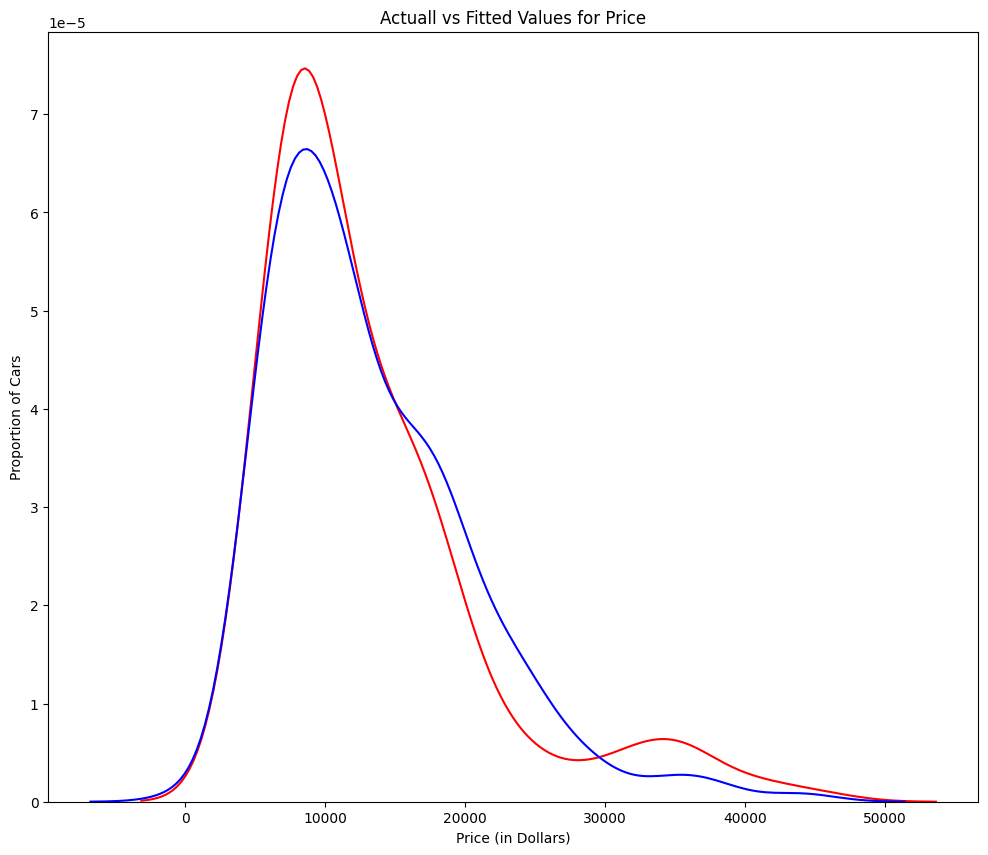

In [ ]:
plt.figure(figsize = (width, height))

ax1 = sns.distplot(cars['price'], hist = False, color = 'r', label = 'Actual Value')
sns.distplot( Y_hat, hist = False, color = 'b', label='Fitted Values', ax=ax1)

plt.title('Actuall vs Fitted Values for Price')
plt.xlabel('Price (in Dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

<p>We can see that the fitted values are reasonably close to the actual values since the two distributions overlap a bit. However, there is definitely some room for improvement.</p>

<h2>3. Polynomial Regression and Pipelines</h2>
<p><b>Polynomial regression</b> is a particular case of the general linear regression model or multiple linear regression models.</p>
<p>We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.</p>

<p>There are different orders of polynomial regression:</p>


<center><b>Quadratic - 2nd Order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2
$$


<center><b>Cubic - 3rd Order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 +b_3 X^3\\\\
$$


<center><b>Higher-Order</b>:</center>
$$
Y = a + b_1 X +b_2 X^2 +b_3 X^3 ....\\
$$

<p>We saw earlier that a linear model did not provide the best fit while using "highway-mpg" as the predictor variable. Let's see if we can try fitting a polynomial model to the data instead.</p>

In [ ]:
def PlotPolly(model, independent_variable, dependent_variable, Name):
  x_new = np.linspace(15, 55, 100)
  y_new = model(x_new)

  plt.plot(independent_variable, dependent_variable, '.', x_new, y_new, '-')
  plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
  ax = plt.gca()
  ax.set_facecolor((0.898, 0.898, 0.898))
  fig = plt.gcf()
  plt.xlabel(Name)
  plt.ylabel("Price of Cars")

  plt.show()
  plt.close()


In [ ]:
x = cars['highway-mpg']
y = cars['price']

In [ ]:
# Let's fit the polynomial using the function polyfit, then use the function poly1d to display the polynomial function.
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


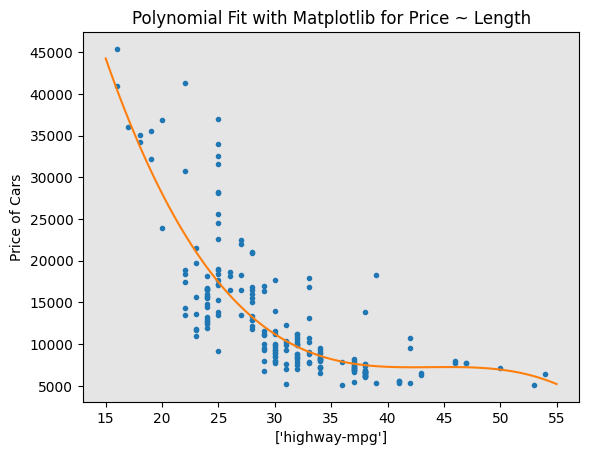

In [ ]:
# Plot the function:
PlotPolly(p, x, y, ['highway-mpg'])


In [ ]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

<p>We can already see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function  "hits" more of the data points.</p>

In [ ]:
# Create 11 order polynomial model with the variables x and y from above:
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)


            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


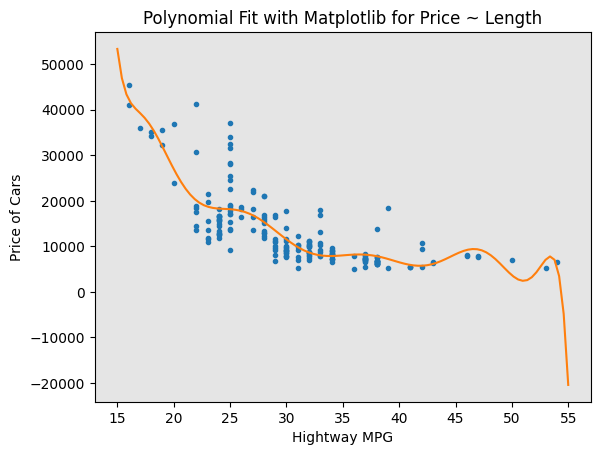

In [ ]:
PlotPolly( p1, x, y, 'Hightway MPG')

<p>The analytical expression for Multivariate Polynomial function gets complicated. For example, the expression for a second-order (degree=2) polynomial with two variables is given by:</p>

$$
Yhat = a + b_1 X_1 +b_2 X_2 +b_3 X_1 X_2+b_4 X_1^2+b_5 X_2^2
$$


We can perform a polynomial transform on multiple features. First, we import the module:


In [ ]:
# Create a PolynomialFeatures object of degree 2:
pr = PolynomialFeatures(degree = 2)
pr

PolynomialFeatures()

In [ ]:
Z_pr = pr.fit_transform(Z)

In [ ]:
Z.shape

(201, 4)

In the original data, there are 201 samples and 4 features.

In [ ]:
Z_pr.shape

(201, 15)

After the transformation, there are 201 samples and 15 features.

<h2>Pipeline</h2>

<p>Data Pipelines simplify the steps of processing the data. We use the module <b>Pipeline</b> to create a pipeline. We also use <b>StandardScaler</b> as a step in our pipeline.</p>

We create the pipeline by creating a list of tuples including the name of the model or estimator and its corresponding constructor.



In [ ]:
input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias = False)), ('model', LinearRegression())]

In [ ]:
# Input the list as an argument to the pipeline constructor:
pipe = Pipeline(input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

First, we convert the data type Z to type float to avoid conversion warnings that may appear as a result of StandardScaler taking float inputs.

Then, we can normalize the data,  perform a transform and fit the model simultaneously.


In [ ]:
Z = Z.astype(float)
pipe.fit(Z, y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

 Similarly,  we can normalize the data, perform a transform and produce a prediction  simultaneously.


In [ ]:
ypipe = pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [ ]:
# Create a pipeline that standardizes the data
input = [('scale', StandardScaler()), ('model', LinearRegression())]
pipe=Pipeline(input)
pipe.fit(Z,y)
# Then produce a prediction using a linear regression model using the features Z and target y.
ypipe = pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

<h2>4. Measures for In-Sample Evaluation</h2>
<p>When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.</p>

<p>Two very important measures that are often used in Statistics to determine the accuracy of a model are:</p>
<ul>
    <li><b>R^2 / R-squared</b></li>
    <li><b>Mean Squared Error (MSE)</b></li>
</ul>
    
<b>R-squared</b>

<p>R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.</p>
    
<p>The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.</p>



<b>Mean Squared Error (MSE)</b>

<p>The Mean Squared Error measures the average of the squares of errors. That is, the difference between actual value (y) and the estimated value (ŷ).</p>


<h3>Model 1: Simple Linear Regression</h3>


In [ ]:
# Calculate R^2
# highway_mpg_fit
lm.fit(X, Y)

#Find the R^2
print('The R-square is: ', lm.score(X,Y))

The R-square is:  0.4965911884339176


We can say that ~49.659% of the variation of the price is explained by this simple linear model "horsepower_fit".

In [ ]:
# Predict the output (yhat) using the predict method where X is the input variable:
Yhat = lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])


The output of the first four predicted value is:  [[16236.50464347]
 [16236.50464347]
 [17058.23802179]
 [13771.3045085 ]]


In [ ]:
# Compare the predicted results with the actual results:
mse = mean_squared_error(cars['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)


The mean square error of price and predicted value is:  31635042.944639888


<h3>Model 2: Multiple Linear Regression</h3>

In [ ]:
# Calculate R^2
# Fit the model
lm.fit(Z, cars['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, cars['price']))

The R-square is:  0.8093562806577457


We can say that ~80.896 % of the variation of price is explained by this multiple linear regression "multi_fit".

Let's calculate the MSE.

In [ ]:
# Produce a prediction
Y_predict_multifit = lm.predict(Z)


In [ ]:
# Compare the predicted results with the actual results:
print('The mean squared error of price and predicted value using multifit is: ', mean_squared_error(cars['price'], Y_predict_multifit))

The mean squared error of price and predicted value using multifit is:  11980366.87072649


<h3>Model 3: Polynomial Fit</h3>

Let's calculate the R^2.

In [ ]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


We can say that ~67.419 % of the variation of price is explained by this polynomial fit.


In [ ]:
# Calculate MSE
mean_squared_error(cars['price'], p(x))

20474146.426361218

<h2>5. Prediction and Decision Making</h2>
<h3>Prediction</h3>

<p>In the previous section, we trained the model using the method <b>fit</b>. Now we will use the method <b>predict</b> to produce a prediction. </p>

In [ ]:
# Create new input
new_input = np.arange(1, 100, 1).reshape(-1, 1)

In [ ]:
# Fit the model
lm.fit(X, Y)
lm

LinearRegression()

In [ ]:
# Produce a prediction
yhat = lm.predict(new_input)
yhat[0:5]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[37601.57247984],
       [36779.83910151],
       [35958.10572319],
       [35136.37234487],
       [34314.63896655]])

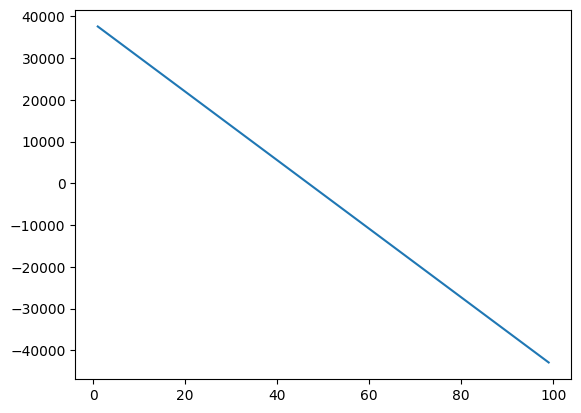

In [ ]:
# Plot the data
plt.plot(new_input, yhat)
plt.show()

<h3>Decision Making: Determining a Good Model Fit</h3>
<p>Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?
<ul>
    <li><i>What is a good R-squared value?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the higher R-squared value is a better fit</b> for the data.
<ul>
    <li><i>What is a good MSE?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the smallest MSE value is a better fit</b> for the data.</p>


<h4>Let's take a look at the values for the different models.</h4>
<p>Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.49659118843391759</li>
    <li>MSE: 3.16 x10^7</li>
</ul>
</p>
    
<p>Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.
<ul>
    <li>R-squared: 0.80896354913783497</li>
    <li>MSE: 1.2 x10^7</li>
</ul>
</p>
    
<p>Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.6741946663906514</li>
    <li>MSE: 2.05 x 10^7</li>
</ul>
</p>



<h3>Simple Linear Regression Model (SLR) vs Multiple Linear Regression Model (MLR)</h3>
<p>Usually, the more variables you have, the better your model is at predicting, but this is not always true. Sometimes you may not have enough data, you may run into numerical problems, or many of the variables may not be useful and even act as noise. As a result, you should always check the MSE and R^2.</p>

<p>In order to compare the results of the MLR vs SLR models, we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.
<ul>
    <li><b>MSE</b>: The MSE of SLR is  3.16x10^7  while MLR has an MSE of 1.2 x10^7.  The MSE of MLR is much smaller.</li>
    <li><b>R-squared</b>: In this case, we can also see that there is a big difference between the R-squared of the SLR and the R-squared of the MLR. The R-squared for the SLR (~0.497) is very small compared to the R-squared for the MLR (~0.809).</li>
</ul>
</p>

This R-squared in combination with the MSE show that MLR seems like the better model fit in this case compared to SLR.


<h3>Simple Linear Model (SLR) vs. Polynomial Fit</h3>
<ul>
    <li><b>MSE</b>: We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.</li>
    <li><b>R-squared</b>: The R-squared for the Polynomial Fit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.</li>
</ul>
<p>Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting "price" with "highway-mpg" as a predictor variable.</p>

<h3>Multiple Linear Regression (MLR) vs. Polynomial Fit</h3>
<ul>
    <li><b>MSE</b>: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.</li>
    <li><b>R-squared</b>: The R-squared for the MLR is also much larger than for the Polynomial Fit.</li>
</ul>


<h2>Conclusion</h2>
<p>Comparing these three models, we conclude that <b>the MLR model is the best model</b> to be able to predict price from our dataset. This result makes sense since we have 27 variables in total and we know that more than one of those variables are potential predictors of the final car price.</p>


### Model Evaluationa and Refinement

#### Training and Testing

Split data into training and testing data

In [ ]:
# Place the target 'price' in a separate df y_data:
y_data = cars['price']

# Drop 'price' data in df x_data:
x_data = cars.drop('price', axis=1)

# Randomly split data into training and testing using the function 'train_test_split'
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, test_size = 0.10, random_state = 1)
print('Number of test samples: ', x_test.shape[0])
print('Number of training samples: ', x_train.shape[0])

Number of test samples:  21
Number of training samples:  180


The <b>test_size</b> parameter sets the proportion of data that is split into the testing set. In the above, the testing set is 10% of the total dataset.

In [ ]:
# Split dataset with 40% of testing data:
x_train1, x_test1, y_train1, y_test1 = train_test_split(
    x_data, y_data, test_size = 0.40, random_state = 0
)
print('Number of test samples: ', x_test1.shape[0])
print('Number of training samples: ', x_train1.shape[0])

Number of test samples:  81
Number of training samples:  120


In [ ]:
# Import LinearRegression from linear_model
from sklearn.linear_model import LinearRegression
# Create Linear Regression object
lre = LinearRegression()
# Fit the model using the future 'horsepower':
lre.fit(x_train[['horsepower']], y_train)

LinearRegression()

In [ ]:
# Calculate R^2 on the test data as x_test
lre.score(x_test[['horsepower']], y_test)

0.36358755750788263

In [ ]:
# Calculate R^2 on the training data as x_train
lre.score(x_train[['horsepower']], y_train)

0.6619724197515104

We can see the R^2 is much smaller using the test data compared to the training data.

In [ ]:
# Calculate R^2 on the test data as x_test1
lre.fit(x_train1[['horsepower']], y_train1)
lre.score(x_test1[['horsepower']], y_test1)

0.7139364665406973

Sometimes you do not have sufficient testing data; as a result, you may want to perform cross-validation. Let's go over several methods that you can use for cross-validation.

#### Cross-Validation Score

In [ ]:
# Import cross_val_score for Cross-Validation Score
from sklearn.model_selection import cross_val_score

We input the object, the feature ("horsepower"), and the target data (y_data). The parameter 'cv' determines the number of folds. In this case, it is 4.

In [ ]:
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv = 4)


The default scoring is R^2. Each element in the array has the average R^2 value for the fold:

In [ ]:
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [ ]:
# Cal culate Avg and Std of the estimate:
print('The mean of folds are ', Rcross.mean(), ' and the standard deviation is ', Rcross.std())

The mean of folds are  0.522009915042119  and the standard deviation is  0.291183944475603


In [ ]:
# use negative squared error as a score by setting the parameter  'scoring' metric to 'neg_mean_squared_error'
-1 * cross_val_score(lre, x_data[['horsepower']], y_data, cv = 4, scoring = 'neg_mean_squared_error')

array([20254142.84026702, 43745493.2650517 , 12539630.34014931,
       17561927.72247591])

In [ ]:
# Calculate the AVG R^2 using 2 folds
Rcross1 = cross_val_score(lre, x_data[['horsepower']], y_data, cv = 2)
Rcross1.mean()

0.5166761697127429

The function 'cross_val_predict' could also be used to predict the output. The function splits up the data into the specified number of folds, with one fold for testing and the other folds are used for training.

In [ ]:
# Cross Validation Prediction
from sklearn.model_selection import cross_val_predict

We input the object, the feature <b>"horsepower"</b>, and the target data <b>y_data</b>. The parameter 'cv' determines the number of folds. In this case, it is 4. We can produce an output:

In [ ]:
yhat = cross_val_predict(lre, x_data[['horsepower']], y_data, cv = 4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

#### Overfitting, Underfitting and Model Selection

In [ ]:
# Create Multiple Linear Regression objects and train the model using 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg' as features
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)



LinearRegression()

In [ ]:
# Prediction using training data:
yhat_train = lr.predict(x_train[['horsepower','curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

In [ ]:
# Prediction using test data
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

In [ ]:
# Create DistributionPlot function to display the distribution of the predicted test output vs. the actual test data.
def DistributionPlot(RedFunction, BlueFuction, RedName, BlueName, Title):
  width = 12
  height = 10
  plt.figure(figsize =(width, height))

  ax1 = sns.kdeplot(RedFunction, color ='r', label = RedName)
  ax2 = sns.kdeplot(BlueFuction, color = 'b', label=BlueName, ax=ax1)

  plt.title(Title)
  plt.xlabel('Price (in Dollars)')
  plt.ylabel('Proportion of Cars')
  plt.show()
  plt.close()


Perform model evaluation using training and testing data seperately

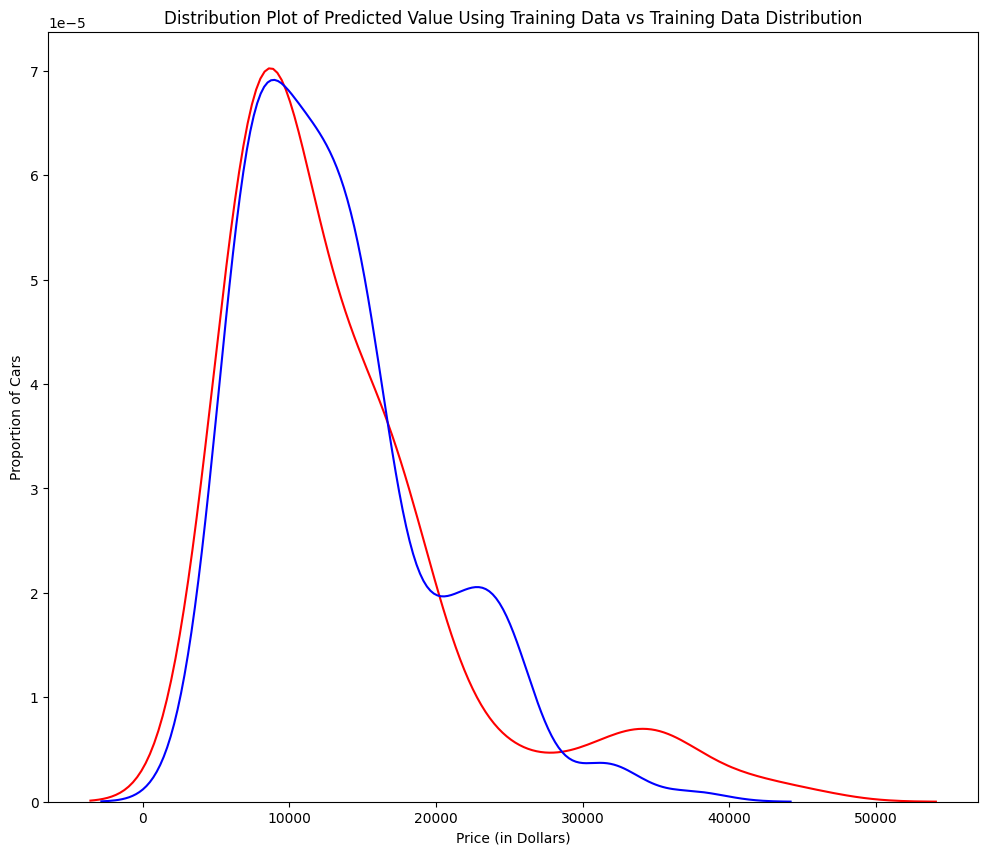

In [ ]:
# Examine the distribution of the predicted values of the training data
Title = 'Distribution Plot of Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat, 'Actual Values (Train)', 'Predicted Values (Train)', Title)


Plot of predicted values using the training data compared to the actual values of the training data.


So far, the model seems to be doing well in learning from the training dataset. But what happens when the model encounters new data from the testing dataset? When the model generates new values from the test data, we see the distribution of the predicted values is much different from the actual target values.

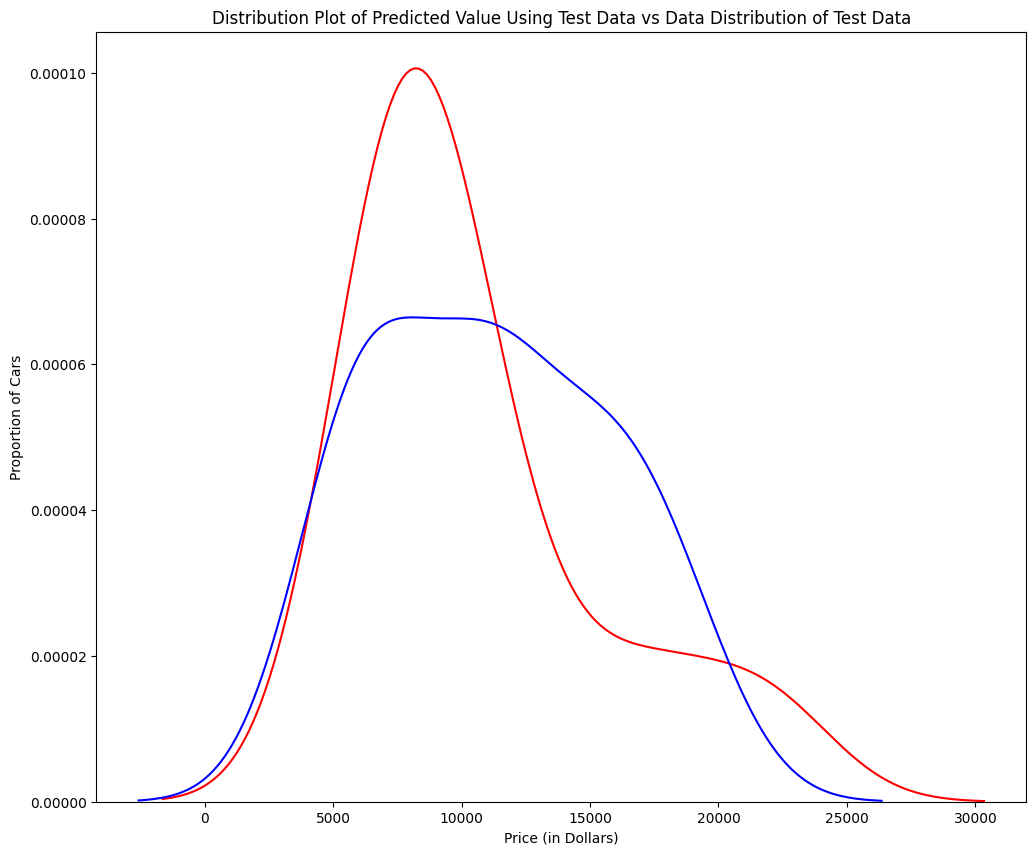

In [ ]:
Title = 'Distribution Plot of Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test, yhat_test, 'Actual Value (Test)', 'Predicted Values (Test)', Title)

Plot of predicted value using the test data compared to the actual values of the test data.

Comparing Figure 1 and Figure 2, it is evident that the distribution of the test data in Figure 1 is much better at fitting the data. This difference in Figure 2 is apparent in the range of 5000 to 15,000. This is where the shape of the distribution is extremely different. Let's see if polynomial regression also exhibits a drop in the prediction accuracy when analysing the test dataset.

##### Overfitting

<p>Overfitting occurs when the model fits the noise, but not the underlying process. Therefore, when testing the model using the test set, the model does not perform as well since it is modelling noise, not the underlying process that generated the relationship. Let's create a degree 5 polynomial model.</p>


In [ ]:
# Try 55% of data for training and the rest for testing
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.45, random_state = 0)

In [ ]:
# Perform a degree 5 polynomial transformation on the feature 'horsepower'
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [ ]:
# Create and train Linear Regression model 'poly'
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [ ]:
# Predict an output as an array yhat
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.65561887,  7307.98782321, 12213.78770965, 18893.24804015,
       19995.95195136])

In [ ]:
# Select the first 5 predicted values and compare to the actual targets
print('Preidcted values: ', yhat[0:4])
print('True Value: ', y_test[0:4].values)

Preidcted values:  [ 6728.65561887  7307.98782321 12213.78770965 18893.24804015]
True Value:  [ 6295. 10698. 13860. 13499.]


In [ ]:
# Create PollyPlot function to display data
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
  width = 12
  height = 10
  plt.figure(figsize=(width, height))

  #training data
  #testing data
  # lr:  linear regression object
  #poly_transform:  polynomial transformation object

  xmax = max([xtrain.values.max(), xtest.values.max()])
  xmin = min([xtrain.values.min(), xtest.values.min()])
  x = np.arange(xmin, xmax, 0.1)

  plt.plot(xtrain, y_train, 'ro', label = 'Training Data')
  plt.plot(xtest, y_test, 'go', label = 'Test Data')
  plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))),
           label = 'Predicted Function')
  plt.ylim([-10000, 60000])
  plt.ylabel('Price')
  plt.legend()



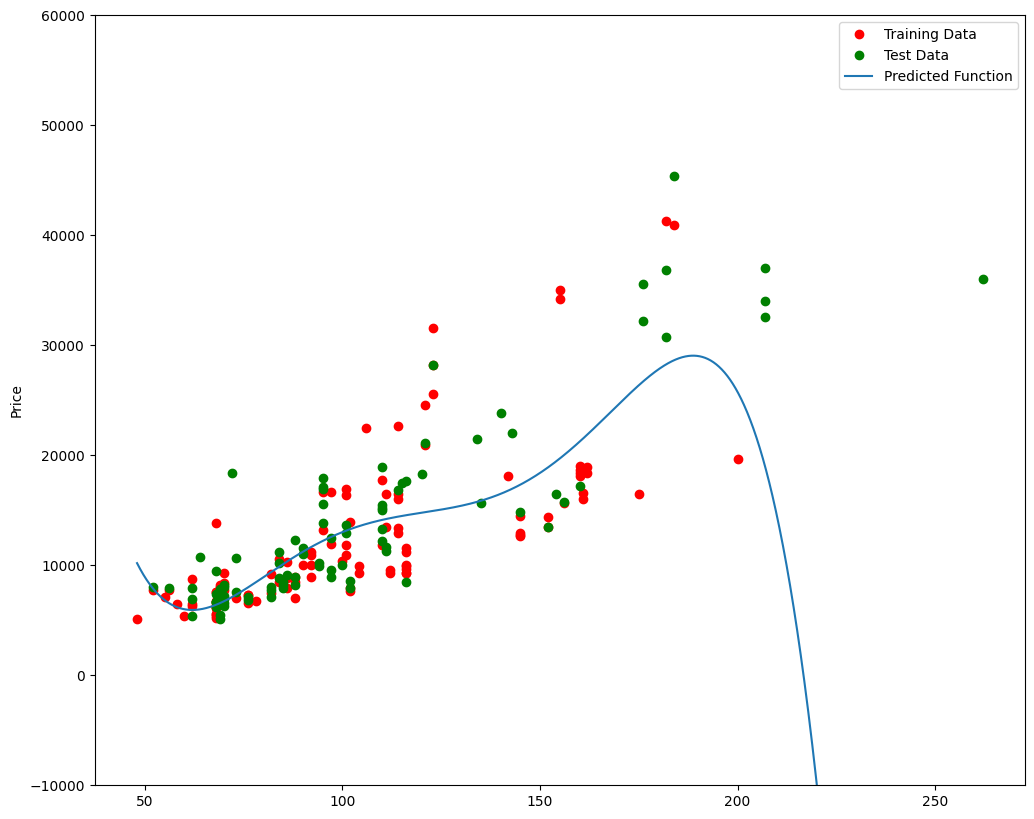

In [ ]:
# Apply 'PollyPlot' created function to display training data, testing data and predicted function
PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly, pr)

A polynomial regression model where red dots represent training data, green dots represent test data, and the blue line represents the model prediction.

We see that the estimated function appears to track the data but around 200 horsepower, the function begins to diverge from the data points.

In [ ]:
# R^2 of training data:
poly.score(x_train_pr, y_train)

0.5567716902120254

In [ ]:
# R^2 of the test data:
poly.score(x_test_pr, y_test)

-29.871340302043684

We see the R^2 for the training data is 0.5567 while the R^2 on the test data was -29.87.  The lower the R^2, the worse the model. A negative R^2 is a sign of overfitting.


Let's see how the R^2 changes on the test data for different order polynomials and then plot the results:


Text(3, 0.75, 'Maximum R^2')

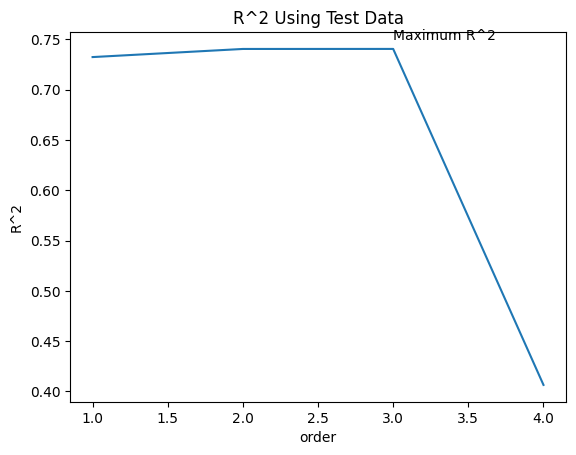

In [ ]:
Rsqu_test = []

order = [1,2,3,4]
for n in order:
  pr = PolynomialFeatures(degree = n)
  x_train_pr = pr.fit_transform(x_train[['horsepower']])
  x_test_pr = pr.fit_transform(x_test[['horsepower']])
  lr.fit(x_train_pr, y_train)
  Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2')

We see the R^2 gradually increases until an order three polynomial is used. Then, the R^2 dramatically decreases at an order four polynomial.


In [ ]:
# Create new function:
def f(order, test_data):
  x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = test_data,
                                                      random_state = 0)
  pr = PolynomialFeatures(degree = order)
  x_train_pr = pr.fit_transform(x_train[['horsepower']])
  x_test_pr = pr.fit_transform(x_test[['horsepower']])
  poly = LinearRegression()
  poly.fit(x_train_pr, y_train)
  PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly, pr)

In [ ]:
# To use interact() below
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

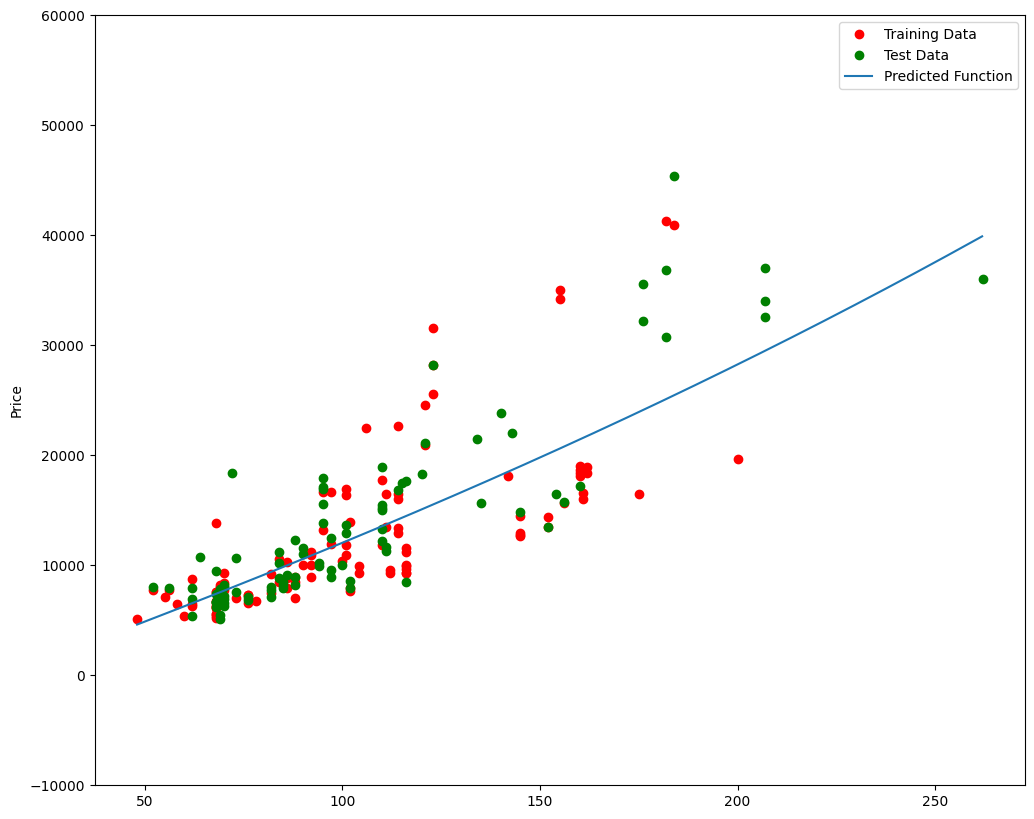

In [ ]:
# Experiment with different polynomial orders and different amounts of data
interact(f, order = (0,6,1), test_data = (0.05, 0.95, 0.05))


In [ ]:
# Perform Polynomial transformation with more than one feature
pr1 = PolynomialFeatures(degree = 2)

In [ ]:
# Transform the training and testing samples for the features 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg'
x_train_pr1 = pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size','highway-mpg']])
x_test_pr1 = pr1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size','highway-mpg']])

In [ ]:
# Count the dimensions that the new feature has
x_train_pr1.shape

(110, 15)

There are now 15 features

In [ ]:
# Create Linear Regression model 'poly1'. Train object using the polynomail features
poly1 = LinearRegression().fit(x_train_pr1, y_train)


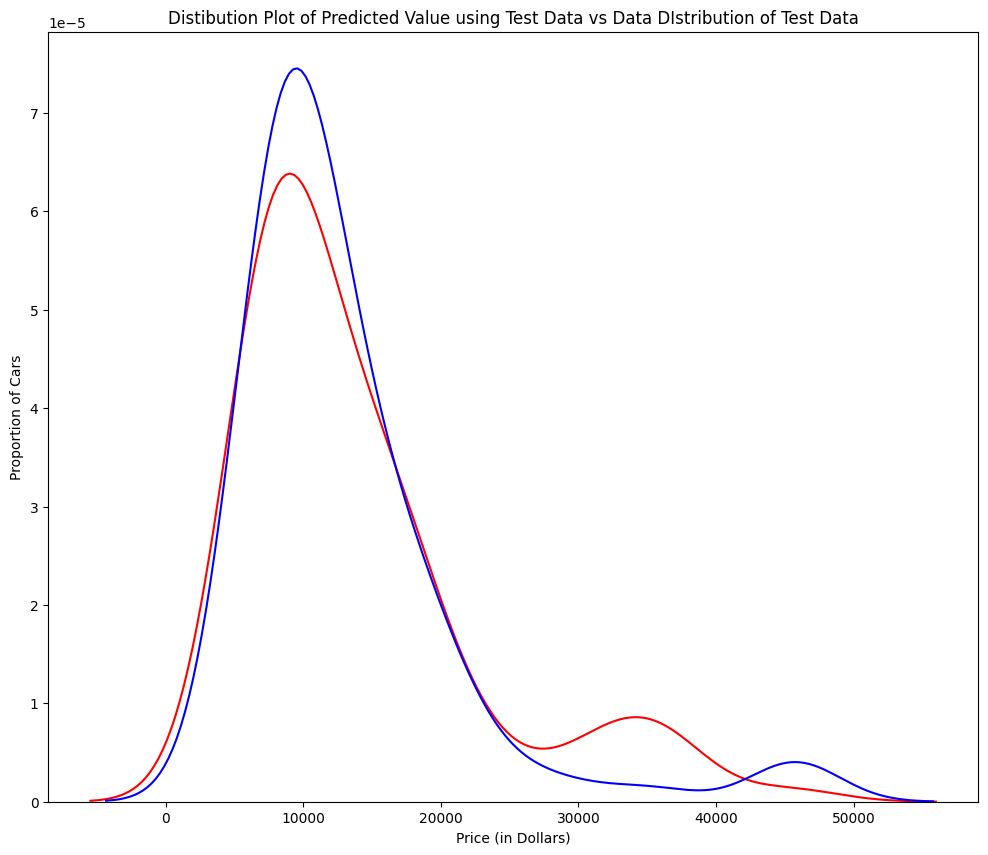

In [ ]:
# Predict an output
yhat_test1 = poly1.predict(x_test_pr1)

# Display the distribution of predicted test output vs the actual test data
Title = 'Distibution Plot of Predicted Value using Test Data vs Data DIstribution of Test Data'

DistributionPlot(y_test, yhat_test1, 'Actual Vualues (Test)', 'Predicted Values (Test)', Title)


The predicted value is higher than actual value for cars where the price 10,000 Dollars range, conversely the predicted price is lower than the price cost in the 30,000 Dollars to 40,000 Dollars range. As such the model is not as accurate in these ranges.

#### Ridge Regression
We will review Ridge Regression and see how the parameter alpha changes the model. Just a note, here our test data will be used as validation data.

In [ ]:
# Perform a degree 2 polynomial:
pr = PolynomialFeatures(degree = 2)
x_train_pr = pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr = pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [ ]:
# Import Ridge
from sklearn.linear_model import Ridge

# Create Ridge regression object, setting the regularization parameter (alpha) to 0.1
RidgeModel = Ridge(alpha = 1)

# Fit the model
RidgeModel.fit(x_train_pr, y_train)

Ridge(alpha=1)

In [ ]:
# Optain a prediction
yhat = RidgeModel.predict(x_test_pr)

# Compare first 5 predicted
print('predicted: ', yhat[0:4])
print('test set: ', y_test[0:4].values)

predicted:  [ 6570.82441941  9636.24891471 20949.92322737 19403.60313256]
test set:  [ 6295. 10698. 13860. 13499.]


We select the value of alpha that minimizes the test error. To do so, we can use a for loop. We have also created a progress bar to see how many iterations we have completed so far.

In [ ]:
# Create the for loop
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
  RidgeModel = Ridge(alpha = alpha)
  RidgeModel.fit(x_train_pr, y_train)
  test_score, train_score = RidgeModel.score(x_test_pr, y_test), RidgeModel.score(x_train_pr, y_train)

  pbar.set_postfix({'Test Score': test_score, 'Train Score': train_score})

  Rsqu_test.append(test_score)
  Rsqu_train.append(train_score)

100%|██████████| 1000/1000 [00:10<00:00, 92.48it/s, Test Score=0.564, Train Score=0.859]


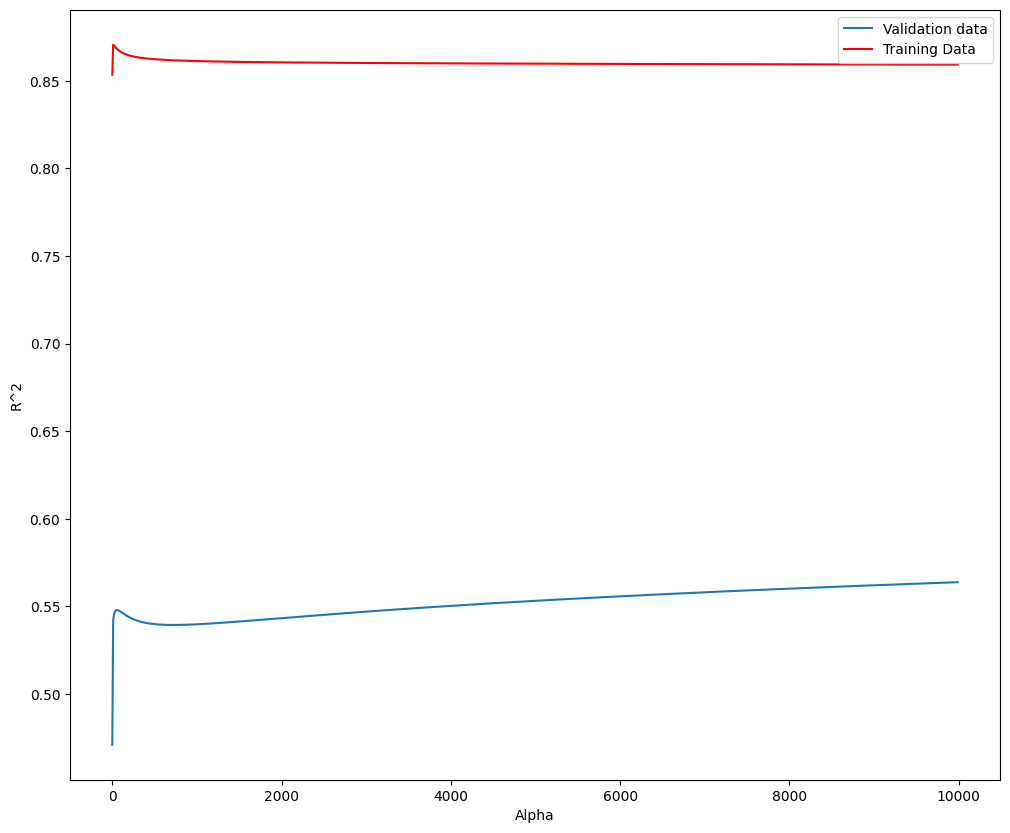

In [ ]:
# Plot out the vallue of R^2 for different alphas:
width = 12
height = 10
plt.figure(figsize = (width, height))

plt.plot(Alpha, Rsqu_test, label = 'Validation data')
plt.plot(Alpha, Rsqu_train, 'r', label = 'Training Data')
plt.xlabel('Alpha')
plt.ylabel('R^2')
plt.legend()


The blue line represents the R^2 of the validation data, and the red line represents the R^2 of the training data. The x-axis represents the different values of Alpha.


Here the model is built and tested on the same data, so the training and test data are the same.

The red line in Figure 4 represents the R^2 of the training data. As alpha increases the R^2 decreases. Therefore, as alpha increases, the model performs worse on the training data

The blue line represents the R^2 on the validation data. As the value for alpha increases, the R^2 increases and converges at a point.

In [ ]:
# As Alpha = 10, perform Ridge regression:
RidgeModel = Ridge(alpha = 10)
RidgeModel.fit(x_train_pr, y_train)
RidgeModel.score(x_test_pr, y_test)

0.5418576440206506

#### Grid Search

The term alpha is a hyperparameter. Sklearn has the class <b>GridSearchCV</b> to make the process of finding the best hyperparameter simpler.

In [ ]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Create a dictionary of parameter values:
parameters1 = [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [ ]:
# Create a Ridge Regression object:
RR = Ridge()
RR

Ridge()

In [ ]:
# Create a ridge grid search object:
Grid1 = GridSearchCV(RR, parameters1, cv = 4)

In [ ]:
# Fot the model:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

The object finds the best parameter values on the validation data. We can obtain the estimator with the best parameters and assign it to the variable BestRR as follows:

In [ ]:
# Obtain the estimator with the best parameters
BestRR = Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [ ]:
# Test teh model on the test data
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036151

In [ ]:
# Perform a Grid search for alpha parameter and nomalization parameter:
parameters2 = [{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

Grid2 = GridSearchCV(Ridge(), parameters2, cv = 4)
Grid2.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

# Find the best values of the parameters
best_alpha = Grid2.best_params_['alpha']
best_ridge_model = Ridge(alpha = best_alpha)
best_ridge_model.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

Ridge(alpha=10000)